#**과제: 차원 축소 실습 및 시각화**



###**차원축소 실습**
1. 코드의 과정을 이해하고 주석 및 빈칸을 채워주세요
2. 최적의 주성분 또는 latent space를 정해서 차원축소를 진행하고 그 이유를 서술해주세요


PCA

원하는 분산 설명 비율을 정하고 시각화를 진행해 필요한 주성분 개수를 정해봅시다!

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

import numpy as np

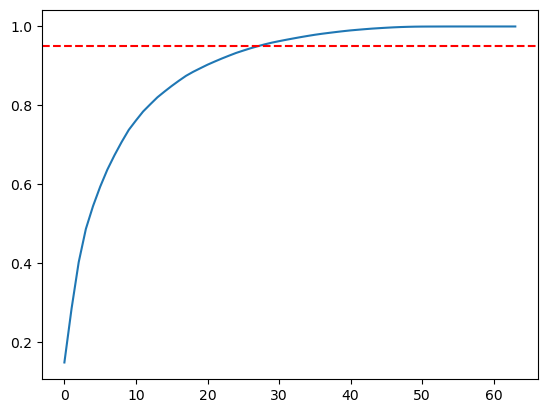

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

##1. 평균 벡터 계산
X_mean=X-np.mean(X,axis=0)

##2. 특이값 분해로 세 개의 행렬로 분해
U,S,Vt=np.linalg.svd(X_mean)

##3. 주성분 벡터 정의(transpose)
principle_components=Vt.T

##4. 각 주성분이 설명하는 분산 비율, 누적 분산 설명 비율 계산 및 시각화
explained_variance = (S ** 2) / (X.shape[0] - 1)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
cumsum = np.cumsum(explained_variance_ratio)

plt.plot(cumsum)

##5.원하는 분산 설명 비율을 y의 값으로 작성해주세요
plt.axhline(y=0.95, color="r", linestyle="--", label="Threshold")


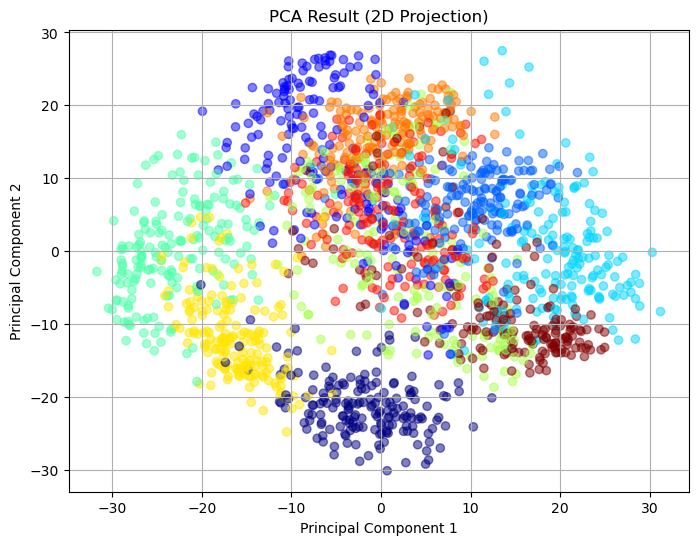

In [5]:
##6. 분산 설명 비율을 만족하는 주성분 개수까지 eigen vector를 잘라봅시다

# 누적 분산 설명 비율이 90%를 넘는 첫 번째 주성분의 인덱스 구하기
n_components = np.argmax(cumsum >= 0.95) + 1

# 선택된 주성분에 해당하는 고유벡터
principle_components = Vt[:n_components].T


##7. 데이터를 정의한 주성분을 이용하여 차원 축소소
X_pca=np.dot(X_mean,principle_components)

##8. 2차원 시각화이지만, 원하신다면 변형하셔도 됩니다.
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],  c=y, cmap="jet", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result (2D Projection)")
plt.grid(True)
plt.show()

In [7]:
principle_components.shape

(64, 29)

문제. PCA에서는 어떤 주성분을 사용하셨나요? 그리고 그 이유는 뭔가요?

답. 데이터를 작은 차원으로 축소하지만, 데이터가 가진 정보를 최대한 보존하기 위해 누적설명 비율이 95% 이상되는 주성분들을 선택하여 사용하였다. 시각화에서는 전체 주성분 중, 데이터의 분산을 가장 많이 설명하는 상위 두 축을 사용하여 데이터의 전반적인 분포 및 구조를 확인하였다.

LDA

선택된 최적의 n_components: 8


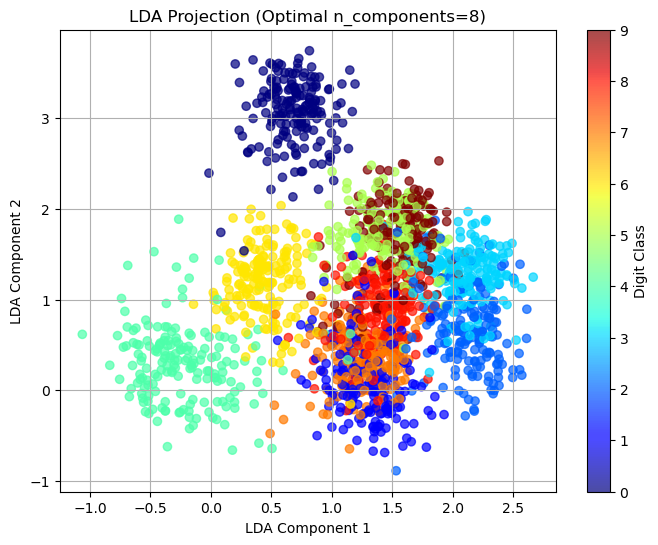

In [9]:
##1. 공분산 행렬 계산을 위한 centering
X_scaled = X-np.mean(X)

##2. 각 클래스의 평균 벡터 계산
class_labels = np.unique(y)
mean_vectors = [np.mean(X_scaled[y == label], axis=0) for label in class_labels]
mean_vectors = np.array(mean_vectors)

##3. 클래스별 scatter matrix 계산 후 합산 하여 클래스 내 scatter matrix 계산
S_W = np.zeros((X.shape[1], X.shape[1]))
for label, mean_vec in zip(class_labels, mean_vectors):
    class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for row in X_scaled[y == label]:
        row = row.reshape(-1, 1)
        mean_vec = mean_vec.reshape(-1, 1)
        class_scatter += (row - mean_vec) @ (row - mean_vec).T
    S_W += class_scatter

##4. 클래스 간 scatter marix 계산(클래스별 평균벡터와 전체 평균벡처 차이 비교)
overall_mean = np.mean(X_scaled, axis=0).reshape(-1, 1)
S_B = np.zeros((X.shape[1], X.shape[1]))
for label, mean_vec in zip(class_labels, mean_vectors):
    mean_vec = mean_vec.reshape(-1, 1)
    n = X_scaled[y == label].shape[0]
    S_B += n * (mean_vec - overall_mean) @ (mean_vec - overall_mean).T

##5. 고유값과 고유벡터 계산
U, S, Vt = np.linalg.svd(S_W)
S_inv = np.diag(1 / S)
S_W_inv = Vt.T @ S_inv @ U.T

M = S_W_inv @ S_B
eigenvalues, eigenvectors = np.linalg.eig(M)


idx = np.argsort(-eigenvalues.real)
eigenvalues = eigenvalues[idx].real
eigenvectors = eigenvectors[:, idx].real

##6. 각 고유벡터가 설명하는 분산 비율, 누적분산비율 구하기
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

##5.원하는 분산 설명 비율을 cumulative_variance의 조건식에 작성해주세요
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"선택된 최적의 n_components: {n_components}")

##6.분산 설명 비율을 만족하는 n_components까지 eigenvector를 자를 수 있도록 빈칸에 알맞게 작성해주세요
W_lda = eigenvectors[:, :n_components]
X_lda = X_scaled @ W_lda


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap="jet", alpha=0.7)
plt.colorbar(scatter, label="Digit Class")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title(f"LDA Projection (Optimal n_components={n_components})")
plt.grid()
plt.show()


Autoencoder

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset


##1. 데이터를 평균0, 표준편차 1로 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)


dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

##2. 오토인코더 모델 정의
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=2): # 2차원으로 압축축
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, latent_dim)
        )

        self.decoder = nn.Sequential( # 데이터의 본래 차원으로 디코딩
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon, z

##3. 디바이스, 손실함수, 옵티마이저 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder(latent_dim=2).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

문제. LDA에서는 어떤 주성분을 사용하셨나요? 그리고 그 이유는 뭔가요?

답. 서로 다른 클래스는 구분이 확실하게 되고, 같은 클래스 내의 데이터들은 가까이 모이게 하여 분류 성능을 향상시킬 수 있는 클래스 간 분산을 최대화, 클래스 내 분산을 최소화할 수 있는 고유벡터를 주성분으로 사용하였다. 

Autoencoder-분류기를 통한 성능 평가

Latent Dim: 2, Accuracy: 0.6933
Latent Dim: 3, Accuracy: 0.5997
Latent Dim: 4, Accuracy: 0.8478
Latent Dim: 5, Accuracy: 0.8731
Latent Dim: 6, Accuracy: 0.6458
Latent Dim: 8, Accuracy: 0.5325


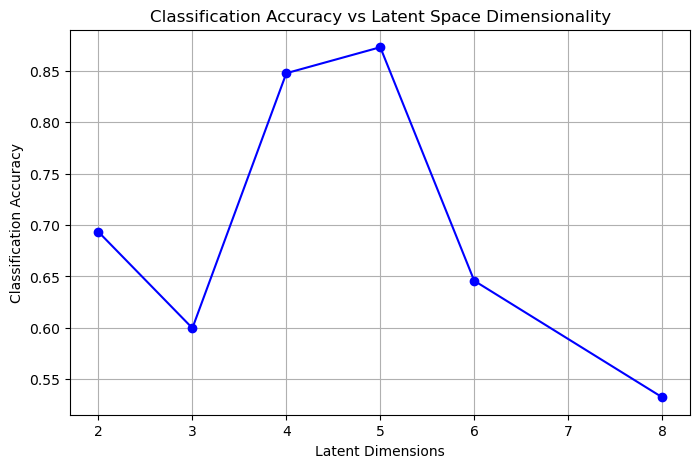

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##원하는 latent_dims로 실험해보세요!!
latent_dims = [2,3,4,5,6,8]  ##eg. latent_dims[3,4]
accuracies = []

##learning rate 조절하셔도 됩니다
for dim in latent_dims:
    model = Autoencoder(latent_dim=dim).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    accuracy=0

##epoch 조절하셔도 됩니다
    for i in range(0,10):
      num_epochs = 20
      for epoch in range(num_epochs):
          for X_batch, _ in data_loader:
              X_batch = X_batch.to(device)
              recon, _ = model(X_batch)
              loss = criterion(recon, X_batch)

              optimizer.zero_grad()
              loss.backward()
              optimizer.step()


      X_encoded = []
      y_labels = []
      with torch.no_grad():
          for X_batch, y_batch in data_loader:
              X_batch = X_batch.to(device)
              _, z = model(X_batch)
              X_encoded.append(z.cpu().numpy())
              y_labels.append(y_batch.numpy())

      X_encoded = np.vstack(X_encoded)
      y_labels = np.hstack(y_labels)

      ##분류기로 성능 평가를 진행해보겠습니다
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_labels, test_size=0.2, random_state=42)
      clf = RandomForestClassifier(n_estimators=100, random_state=42)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      accuracy += accuracy_score(y_test, y_pred)

    accuracies.append(accuracy/10)

    print(f"Latent Dim: {dim}, Accuracy: {accuracy/10:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(latent_dims, accuracies, marker="o", linestyle="-", color="b")
plt.xlabel("Latent Dimensions")
plt.ylabel("Classification Accuracy")
plt.title("Classification Accuracy vs Latent Space Dimensionality")
plt.grid()
plt.show()

Autoencoder 결과 시각화

원하는 latent space를 지정해서 시각화를 진행해봅시다

Epoch [1/20], Loss: 29.3773
Epoch [2/20], Loss: 27.4417
Epoch [3/20], Loss: 27.4200
Epoch [4/20], Loss: 27.4932
Epoch [5/20], Loss: 27.6212
Epoch [6/20], Loss: 27.4069
Epoch [7/20], Loss: 27.4357
Epoch [8/20], Loss: 27.5334
Epoch [9/20], Loss: 27.5407
Epoch [10/20], Loss: 27.4969
Epoch [11/20], Loss: 27.7394
Epoch [12/20], Loss: 27.3635
Epoch [13/20], Loss: 27.4364
Epoch [14/20], Loss: 26.7416
Epoch [15/20], Loss: 26.7746
Epoch [16/20], Loss: 25.9490
Epoch [17/20], Loss: 25.4836
Epoch [18/20], Loss: 25.3858
Epoch [19/20], Loss: 25.2232
Epoch [20/20], Loss: 25.0754


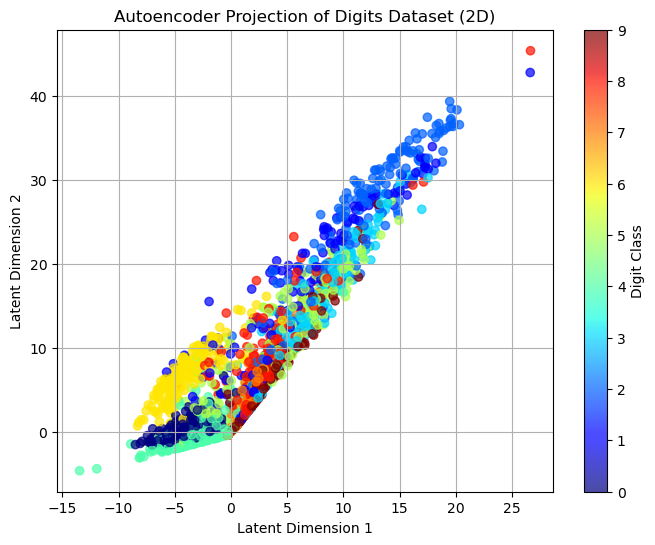

In [18]:
model = Autoencoder(latent_dim=5).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


num_epochs = 20
for epoch in range(num_epochs):
    total_loss = 0
    for X_batch, _ in data_loader:
        X_batch = X_batch.to(device)
        recon, _ = model(X_batch)
        loss = criterion(recon, X_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

X_encoded = []
y_labels = []

with torch.no_grad():
    for X_batch, y_batch in data_loader:
        X_batch = X_batch.to(device)
        _, z = model(X_batch)
        X_encoded.append(z.cpu().numpy())
        y_labels.append(y_batch.numpy())

X_encoded = np.vstack(X_encoded)
y_labels = np.hstack(y_labels)


plt.figure(figsize=(8, 6))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y_labels, cmap="jet", alpha=0.7)
plt.colorbar(label="Digit Class")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Autoencoder Projection of Digits Dataset (2D)")
plt.grid()
plt.show()

문제. Autoencoder에서는 어떤 latent space를 사용하셨나요? 그리고 그 이유는 뭔가요?

답. 여러 차원에 대한 정확도를 보았을 때, 너무 낮은 차원에서는 데이터가 손실되어 성능이 저하되고, 높은 차원에서는 복잡도가 높아져 성능이 저하되는 경향을 보였기 때문에 분류 성능과 차원 축소 효과를 고려한 최적의 차원 5를 사용하였다.

###**T-SNE를 이용한 시각화**
PCA와 t-SNE의 차원 축소 결과를 시각화하고 비교해보세요. 답 작성란은 아래에 있습니다:)

In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd


data_digit= datasets.load_digits()

df_digit = pd.DataFrame(data = data_digit['data'], columns=data_digit['feature_names'])
label_digit = data_digit['target']

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tsne = TSNE(n_components=2)

df_digit_tsne=pd.DataFrame(data=tsne.fit_transform(df_digit),columns=["col1","col2"])
df_digit_tsne["label"]=label_digit

scaler=StandardScaler()
df_digit_scaled=pd.DataFrame(data=scaler.fit_transform(df_digit))

pca=PCA(n_components=2)
df_digit_pca=pd.DataFrame(data=pca.fit_transform(df_digit_scaled),columns=["col1","col2"])


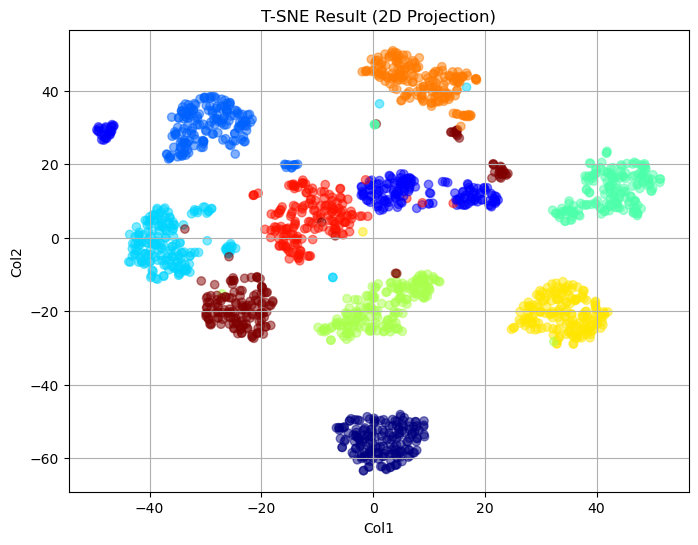

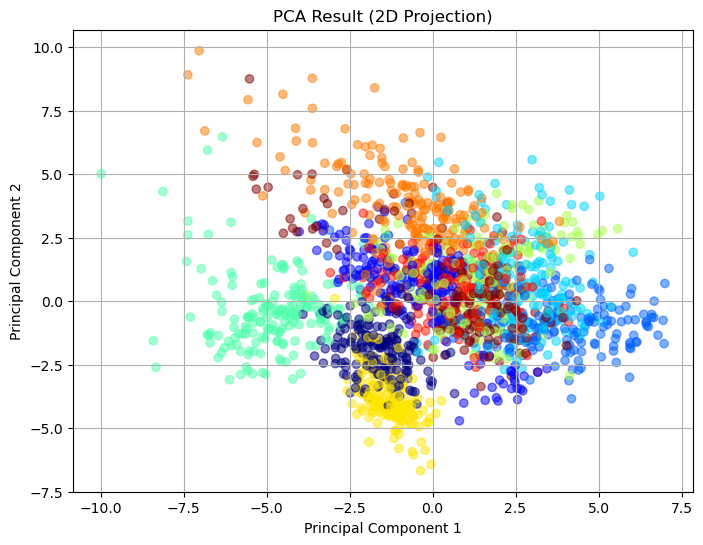

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df_digit_tsne['col1'], df_digit_tsne['col2'],  c=label_digit, cmap="jet", alpha=0.5)
plt.xlabel("Col1")
plt.ylabel("Col2")
plt.title("T-SNE Result (2D Projection)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_digit_pca['col1'], df_digit_pca['col2'],  c=label_digit, cmap="jet", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result (2D Projection)")
plt.grid(True)
plt.show()

문제. 어떤 차원축소 기법이 더 좋은 시각화 결과를 냈는지, 이 이유가 무엇인지 서술하세요

답: t-SNE 차원축소 기법이 더 나은 시각화 결과를 내었음을 알 수 있다. 비슷한 데이터끼리 모여있고, 클래스 간 구분이 명확하기 때문이다. 반면 PCA는 분산을 최대한 보존하는 방식으로 차원축소를 수행하기 때문에 클래스 간 구분이 다소 어려운 결과가 출력되었다.